In [1]:
import matplotlib.pyplot as plt
from matplotlib.mlab import csv2rec
from matplotlib.cbook import get_sample_data

In [2]:
fname = get_sample_data('percent_bachelors_degrees_women_usa.csv')
gender_degree_data = csv2rec(fname)

In [3]:
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

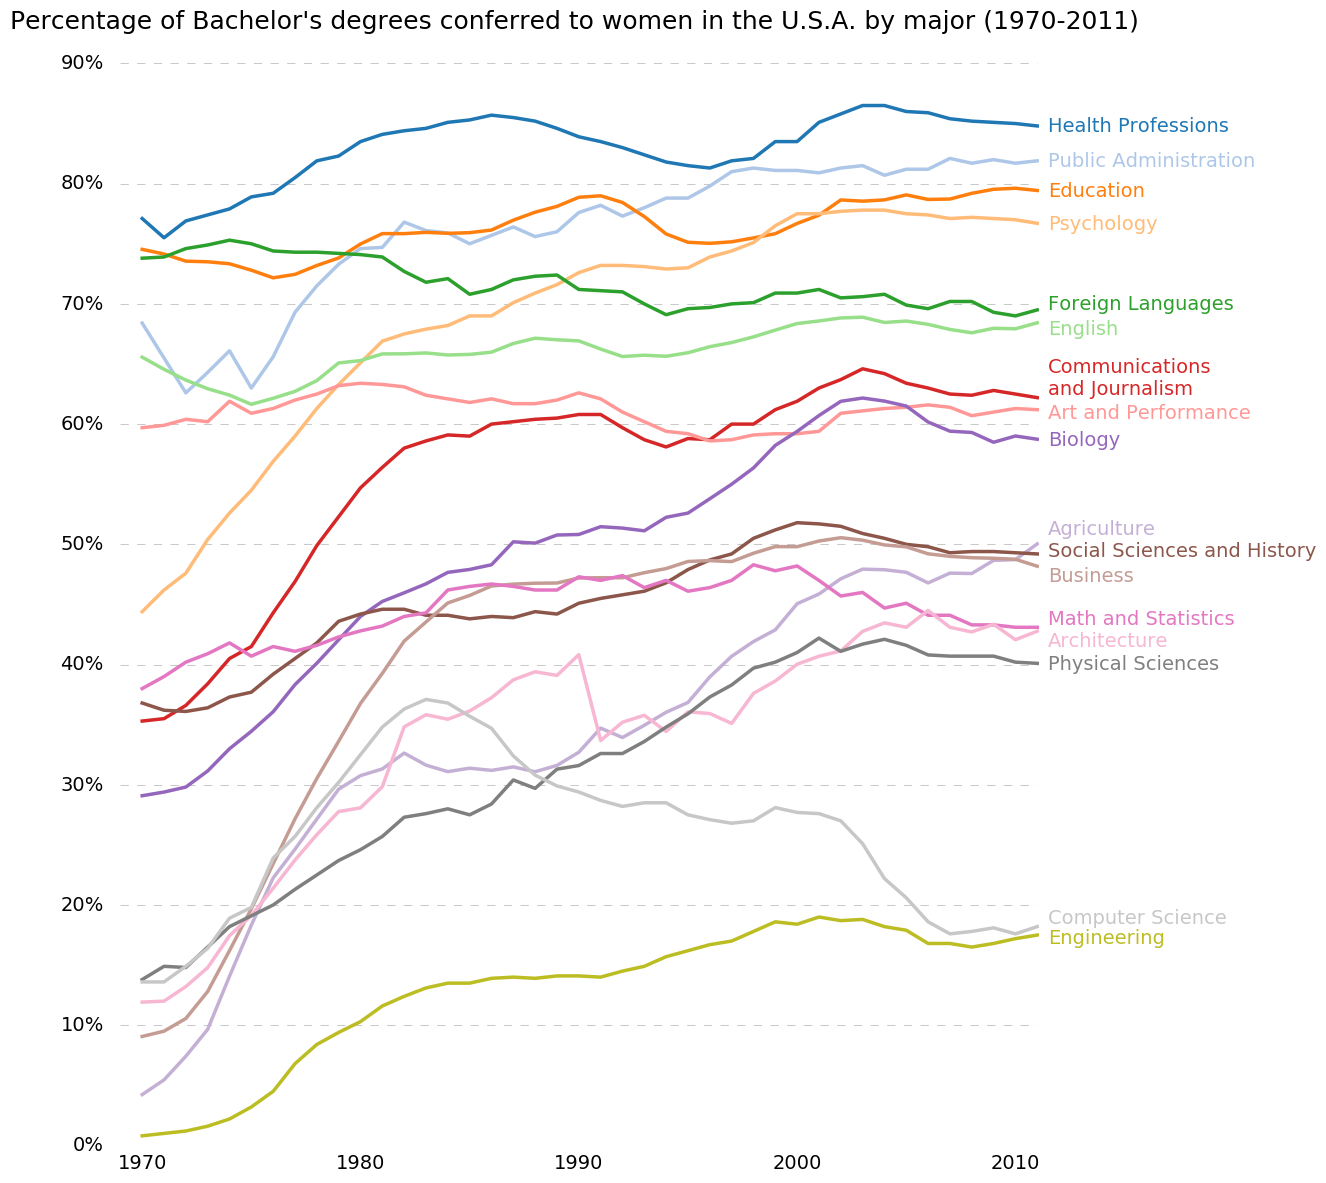

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 14))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlim(1968.5, 2011.1)
plt.ylim(-0.25, 90)
plt.xticks(range(1970, 2011, 10), fontsize=14)
plt.yticks(range(0, 91, 10), ['{0}%'.format(x)
                              for x in range(0, 91, 10)], fontsize=14)
for y in range(10, 91, 10):
    plt.plot(range(1969, 2012), [y] * len(range(1969, 2012)), '--',
             lw=0.5, color='black', alpha=0.3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')
majors = ['Health Professions', 'Public Administration', 'Education',
          'Psychology', 'Foreign Languages', 'English',
          'Communications\nand Journalism', 'Art and Performance', 'Biology',
          'Agriculture', 'Social Sciences and History', 'Business',
          'Math and Statistics', 'Architecture', 'Physical Sciences',
          'Computer Science', 'Engineering']
y_offsets = {'Foreign Languages': 0.5, 'English': -0.5,
             'Communications\nand Journalism': 0.75,
             'Art and Performance': -0.25, 'Agriculture': 1.25,
             'Social Sciences and History': 0.25, 'Business': -0.75,
             'Math and Statistics': 0.75, 'Architecture': -0.75,
             'Computer Science': 0.75, 'Engineering': -0.25}

for rank, column in enumerate(majors):
    # Plot each line separately with its own color.
    column_rec_name = column.replace('\n', '_').replace(' ', '_').lower()

    line = plt.plot(gender_degree_data.year,
                    gender_degree_data[column_rec_name],
                    lw=2.5,
                    color=color_sequence[rank])

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = gender_degree_data[column_rec_name][-1] - 0.5

    if column in y_offsets:
        y_pos += y_offsets[column]

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    plt.text(2011.5, y_pos, column, fontsize=14, color=color_sequence[rank])
    plt.title('Percentage of Bachelor\'s degrees conferred to women in '
          'the U.S.A. by major (1970-2011)\n', fontsize=18, ha='center')
    plt.savefig('/tmp/working/kaggle/datascientist/figures/percent-bachelors-degrees-women-usa.png', bbox_inches='tight')